In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm, eigh, svd, eigvals, inv, cholesky
import matplotlib.pyplot as plt
from time import time

## Problem 1

In [2]:
data_1 = pd.read_csv("DailyReturn.csv", index_col=0)
data_1

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
44606.0,-0.003269,0.001423,-0.000136,0.012222,0.018326,0.009260,0.008723,-0.008426,0.013278,-0.015228,...,-0.013455,-0.008396,-0.005559,0.000520,-0.015466,-0.023272,-0.004768,-0.008806,-0.009122,-0.010335
44607.0,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028571,0.013237
44608.0,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025983
44609.0,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030856,-0.031925,-0.033380,-0.028763
44610.0,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44960.0,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
44963.0,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
44964.0,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
44965.0,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [3]:
def ewma_covariance(returns, lambd):
    center_returns = returns - np.mean(returns, axis=0)
    covariance = np.zeros((returns.shape[1], returns.shape[1]))
    
    for t in range(returns.shape[0]):
        row = center_returns.iloc[t] # First t rows
        covariance = lambd * covariance + (1 - lambd) * np.outer(row, row)
    
    return covariance

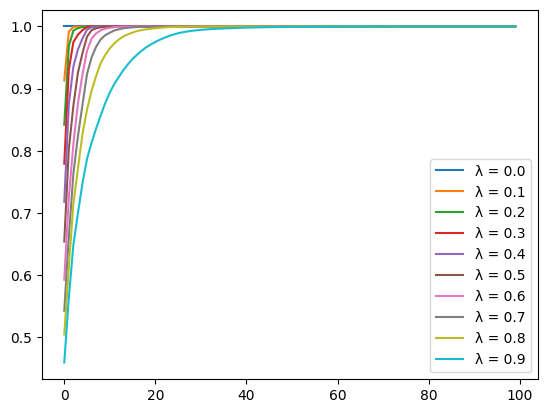

In [4]:
for lambd in np.arange(0, 1, 0.1):
    covariance = ewma_covariance(data_1, lambd)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    
    explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    
    plt.plot(explained_variance, label=f"λ = {lambd:.1f}")

plt.legend()
plt.show()

## Problem 2

In [5]:
# Cholesky factorization
def chol_pd(a):
    n = a.shape[0]
    root = np.zeros((n, n))

    for j in range(n):
        s = 0.0
        if j > 0:
            s = np.dot(root[j, :j-1], root[j, :j-1])
        
        root[j, j] = np.sqrt(a[j, j] - s)
        
        ir = 1.0 / root[j, j]
        for i in range(j + 1, n):
            s = np.dot(root[i, :j-1], root[j, :j-1])
            root[i, j] = (a[i, j] - s) * ir
    
    return root

In [6]:
# Nearest positive semi-definite
def near_psd(a, epsilon=0.0):
    out = a.copy()
    eigvals, eigvecs = np.linalg.eigh(out)
    eigvals[eigvals < 0] = 0
    out = eigvecs @ np.diag(eigvals) @ eigvecs.T
    out = (out + out.T) / 2
    
    D = np.diag(out)
    D_sqrt = np.sqrt(D)
    out = out / np.outer(D_sqrt, D_sqrt)
    
    return out

In [7]:
def highams(a, epsilon=0.0):
    n = a.shape[0]
    t = np.eye(n) * epsilon
    a_new = a + t
    eigvals, eigvecs = eigh(a_new)
    
    for i in range(n):
        if eigvals[i] < 0:
            eigvals[i] = epsilon
            
    return eigvecs.dot(np.diag(eigvals)).dot(eigvecs.T)

In [8]:
n = 500
sigma = np.full((n, n), 0.9)
for i in range(n):
    sigma[i, i] = 1.0
sigma[0, 1] = 0.7357
sigma[1, 0] = 0.7357

In [9]:
# Fix matrix using near_psd()
t0 = time()
fixed_sigma1 = near_psd(sigma, epsilon=2.0)
t1 = time() - t0

# Fix matrix using Higham's method
t0 = time()
fixed_sigma2 = highams(sigma, epsilon=0.01)
t2 = time() - t0

# Confirm fixed matrices are PSD
assert np.all(np.linalg.eigvals(fixed_sigma1) >= 0)
assert np.all(np.linalg.eigvals(fixed_sigma2) >= 0)

# Compare Frobenius Norm of fixed matrices to original matrix
orig_norm = norm(sigma, 'fro')
near_norm = norm(fixed_sigma1 - sigma, 'fro')
higham_norm = norm(fixed_sigma2 - sigma, 'fro')

print(f"Original matrix Frobenius norm: {orig_norm}")
print(f"Difference of Frobenius norm with Near PSD matrix: {near_norm}")
print(f"Difference of Frobenius norm with Higham's method: {higham_norm}") # Better
print(f"Near PSD runtime: {t1:.5f}s") # n increase, time less than higham
print(f"Higham's method runtime: {t2:.5f}s")

Original matrix Frobenius norm: 450.10494610588376
Difference of Frobenius norm with Near PSD matrix: 0.6275226557650264
Difference of Frobenius norm with Higham's method: 0.23520904995156328
Near PSD runtime: 0.03990s
Higham's method runtime: 0.04730s


## Problem 3

In [10]:
def populate_weights(x, w, cumulative_w, lam):
    n = len(x)
    tw = 0.0
    for i in range(n):
        x[i] = i
        w[i] = (1 - lam) * lam**i
        tw += w[i]
        cumulative_w[i] = tw
    for i in range(n):
        w[i] = w[i] / tw
        cumulative_w[i] = cumulative_w[i] / tw
    return w, cumulative_w

In [11]:
def simulate_direct(mean, cov, n):
    L = cholesky(cov)
    Z = np.random.normal(size=(n, len(mean)))
    X = np.dot(Z, L.T) + mean
    return X

In [12]:
# Function to simulate multivariate normal using PCA
def simulate_pca(mean, cov, n, variance_explained):
    eigenvalues, eigenvectors = eigh(cov)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    cumsum = np.cumsum(eigenvalues)
    total_var = cumsum[-1]
    idx = np.argmax(cumsum >= variance_explained * total_var)
    pcs = eigenvectors[:, :idx+1]
    scaled_eigenvalues = eigenvalues[:idx+1] / total_var
    scaled_eigenvectors = eigenvectors[:, :idx+1] / np.sqrt(total_var)
    Z = np.random.normal(size=(n, idx+1))
    X = mean + np.dot(pcs, np.dot(np.diag(np.sqrt(scaled_eigenvalues)), Z.T)).T
    return X

In [13]:
# Function to calculate the covariance matrix of the simulated values
def calculate_simulated_covariance(simulated_data):
    return np.cov(simulated_data, rowvar=False)

In [14]:
# Function to compare the simulated covariance to the input matrix using the Frobenius norm
def compare_covariances(input_covariance, simulated_covariance):
    return np.linalg.norm(input_covariance - simulated_covariance)

In [15]:
# Function to generate covariance matrices using different methods
def generate_covariance_matrices(correlation_matrix, variance_vector):
    covariance_matrices = []
    covariance_matrices.append(np.diag(variance_vector))
    covariance_matrices.append(np.multiply(correlation_matrix, np.outer(variance_vector, variance_vector)))
    lambda_097_weights = np.flip(populate_weights(np.zeros_like(variance_vector), np.zeros_like(variance_vector), np.zeros_like(variance_vector), 0.97)[0])
    covariance_matrices.append(np.multiply(correlation_matrix, np.outer(variance_vector*lambda_097_weights, variance_vector*lambda_097_weights)))
    return covariance_matrices

In [18]:
# Load data and calculate returns
df = pd.read_csv("DailyReturn.csv", index_col=0)
returns = df
n_simulations = 250000

# Generate correlation matrix and variance vector using standard Pearson correlation and variance
mean_vector = df.mean().values
correlation_matrix_pearson = returns.corr().values
variance_vector_pearson = returns.var().values
input_covariance_pearson = generate_covariance_matrices(correlation_matrix_pearson, variance_vector_pearson)[1]

# Generate correlation matrix and variance vector using exponentially weighted lambda = 0.97
lambda_097_weights = np.flip(populate_weights(np.zeros_like(variance_vector_pearson), np.zeros_like(variance_vector_pearson), np.zeros_like(variance_vector_pearson), 0.97)[0])
weighted_returns = returns.multiply(lambda_097_weights)
correlation_matrix_ew = weighted_returns.corr().values
variance_vector_ew = weighted_returns.var().values
input_covariance_ew = generate_covariance_matrices(correlation_matrix_ew, variance_vector_ew)[1]

In [19]:
# Generate covariance matrices using different combinations of correlation and variance
covariance_matrices = []
covariance_matrices.append(input_covariance_pearson)
covariance_matrices.append(generate_covariance_matrices(correlation_matrix_pearson, variance_vector_ew)[1])
covariance_matrices.append(generate_covariance_matrices(correlation_matrix_ew, variance_vector_pearson)[1])
covariance_matrices.append(generate_covariance_matrices(correlation_matrix_ew, variance_vector_ew)[1])

# Simulate data from each covariance matrix using direct simulation and PCA with different amounts of variance explained
results = []
for i in range(len(covariance_matrices)):
    start_time = time()
    covariance_matrix = covariance_matrices[i] + np.eye(covariance_matrices[i].shape[0]) * 1e-6  # add small constant to ensure positive definiteness
    mean = np.zeros_like(variance_vector_pearson)
    simulated_data_direct = simulate_direct(mean_vector, covariance_matrix, n_simulations)
    simulated_data_pca_100 = simulate_pca(mean_vector, covariance_matrix, n_simulations, 1)
    simulated_data_pca_75 = simulate_pca(mean_vector, covariance_matrix, n_simulations, 0.75)
    simulated_data_pca_50 = simulate_pca(mean_vector, covariance_matrix, n_simulations, 0.5)
    direct_covariance = calculate_simulated_covariance(simulated_data_direct)
    pca_100_covariance = calculate_simulated_covariance(simulated_data_pca_100)
    pca_75_covariance = calculate_simulated_covariance(simulated_data_pca_75)
    pca_50_covariance = calculate_simulated_covariance(simulated_data_pca_50)
    direct_error = compare_covariances(covariance_matrix, direct_covariance)
    pca_100_error = compare_covariances(covariance_matrix, pca_100_covariance)
    pca_75_error = compare_covariances(covariance_matrix, pca_75_covariance)
    pca_50_error = compare_covariances(covariance_matrix, pca_50_covariance)
    end_time = time()
    results.append({"method": i+1, "direct_error": direct_error, "pca_100_error": pca_100_error, "pca_75_error": pca_75_error, "pca_50_error": pca_50_error, "time": end_time - start_time})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

   method  direct_error  pca_100_error  pca_75_error  pca_50_error      time
0       1  2.774464e-07       0.187137      0.182202      0.176573  2.017069
1       2  2.022915e-07       0.099982      0.086651      0.070731  2.149114
2       3  2.661553e-07       0.187321      0.181695      0.176617  1.996616
3       4  2.009855e-07       0.100056      0.086608      0.070744  2.130980
